# Want to generate a library of pulses without and with noise
---
for the noise we consider a gaussian elecronics noise

In [ ]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt


from matplotlib import rc
rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

%cd /content/drive/My Drive/Didattica/Corsi/AI/Lectures/Lecture3/DenoisingAE/
!ls


Mounted at /content/drive/
/content/drive/My Drive/Didattica/Corsi/AI/Lectures/Lecture3/DenoisingAE
AE_denoise.ipynb  data	Generate_pulses.ipynb  MC_Methods.ipynb


In [ ]:
#dataset stats
nsamples = 200000

scint_tau_range = [30, 50]
sipm_tau_range = [8, 12]
ampli_range = [10, 100]
time_shift_range = [0, 50] #ns

#shape configuration
window = [0, 300]
step = 0.5

#visualization
n_samples_visualize = 100


In [ ]:
def makeRandomEvents(xmin, xmax, howMany):
        xArray=(xmin + np.random.random(howMany)*(xmax-xmin))
        return xArray

In [ ]:
def mypulse(t, tauRise, tauDecay, theta, norm):
    return norm * (np.exp(-(t-theta)/tauDecay) - np.exp(-(t-theta)/tauRise))/(tauDecay - tauRise) * (t > theta) #heaviside

In [ ]:
scint_tau_range_array  = makeRandomEvents(scint_tau_range[0], scint_tau_range[1], nsamples)
sipm_tau_range_array   = makeRandomEvents(sipm_tau_range[0], sipm_tau_range[1], nsamples)
ampli_range_array      = makeRandomEvents(ampli_range[0], ampli_range[1], nsamples)
time_shift_range_array = makeRandomEvents(time_shift_range[0], time_shift_range[1], nsamples)

Generating sample:  0
Generating sample:  10000
Generating sample:  20000
Generating sample:  30000
Generating sample:  40000
Generating sample:  50000
Generating sample:  60000
Generating sample:  70000
Generating sample:  80000
Generating sample:  90000
Generating sample:  100000
Generating sample:  110000
Generating sample:  120000
Generating sample:  130000
Generating sample:  140000
Generating sample:  150000
Generating sample:  160000
Generating sample:  170000
Generating sample:  180000
Generating sample:  190000


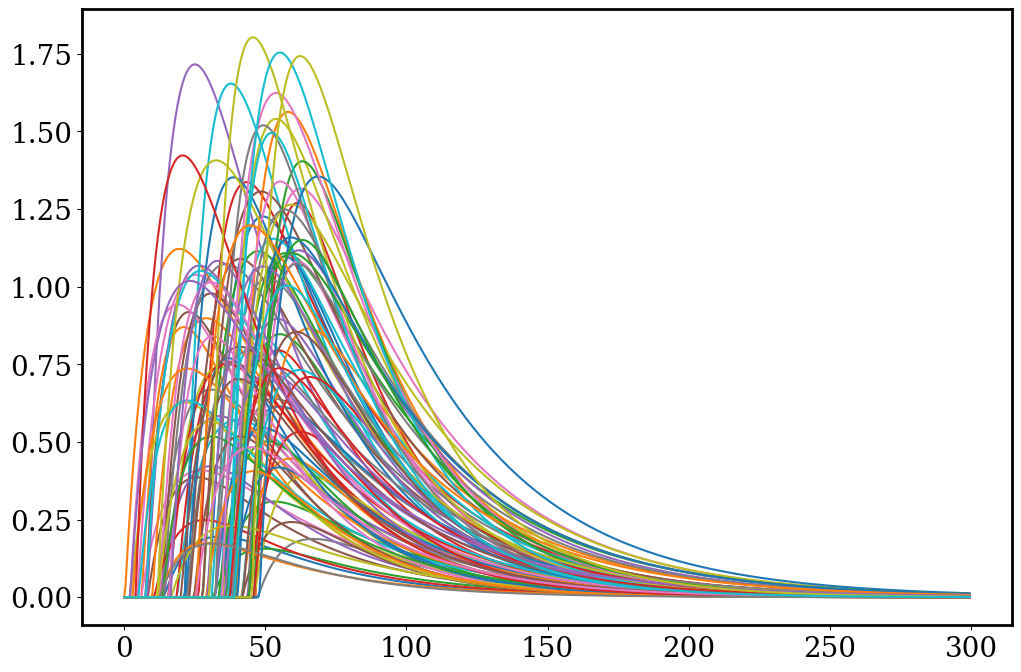

In [ ]:

xx = np.arange(window[0], window[1], step)
data = []

for sample in range(nsamples):

    if sample % 10000 == 0:
        print("Generating sample: ", sample)

    taur = sipm_tau_range_array[sample]
    taud = scint_tau_range_array[sample]
    ampli = ampli_range_array[sample]
    shift = time_shift_range_array[sample]

    yy = mypulse(xx, taur, taud, shift, ampli)
    data.append((xx,yy))


    if sample<n_samples_visualize:
        plt.plot(xx, yy)


In [ ]:
print(np.shape(np.array(data[0][0])))
np.save('./data/signal_waves.npy', data)

(600,)


# Now add noise to the PS we have just generated and save them again

Processing sample:  0
Processing sample:  10000
Processing sample:  20000
Processing sample:  30000
Processing sample:  40000
Processing sample:  50000
Processing sample:  60000
Processing sample:  70000
Processing sample:  80000
Processing sample:  90000
Processing sample:  100000
Processing sample:  110000
Processing sample:  120000
Processing sample:  130000
Processing sample:  140000
Processing sample:  150000
Processing sample:  160000
Processing sample:  170000
Processing sample:  180000
Processing sample:  190000


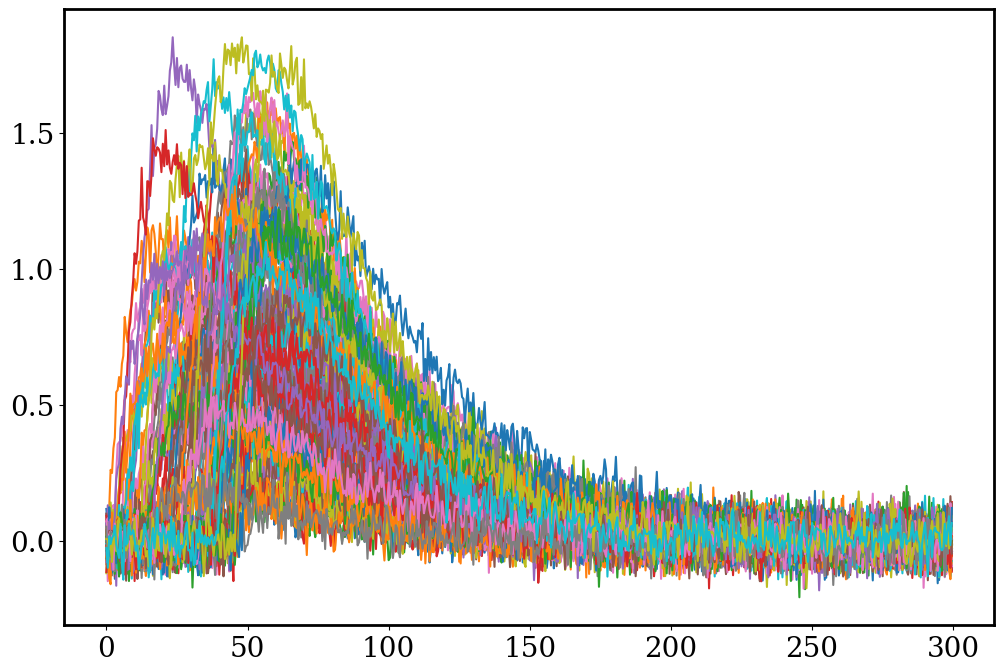

In [ ]:
# Load data
data = np.load('./data/signal_waves.npy')
xx, yy = data[:,0], data[:,1]


#noise params:
noise_mean = 0
noise_sigma = 0.05

# Add noise to data
noisy_data = []
for sample in range(0, len(xx)):
    if sample % 10000 == 0:
        print("Processing sample: ", sample)

    pure = np.array(yy[sample])
    noise = np.random.normal(noise_mean, noise_sigma, pure.shape)
    signal = pure + noise
    noisy_data.append((xx[sample], signal))

    if sample<n_samples_visualize:
        plt.plot(xx[sample], signal)


In [ ]:
# Save data to file for re-use
np.save('./data/signal_waves_noisy.npy', noisy_data)